In [ ]:
17대 대통령 이명박 재임 (08.02.25 ~ 13.02.24)
18대 전 국회의원, 박근혜 재임(13.02.25 ~ 17.03.10)
19대 현 대통령 문재인 재임 중 (17.05.10 ~ 현재)

In [1]:
from bs4 import BeautifulSoup  #크롤링
import requests
from konlpy.tag import Twitter  #형태소분석

In [2]:
from collections import Counter
from wordcloud import WordCloud  #워드클라우드 생성
import matplotlib.pyplot as plt  #워드클라우드 출력

import numpy as np
from PIL import Image
from os import path
import os
import pandas as pd

In [3]:
search_word = "북한"  # 검색어 지정
title_list = []
def get_titles(start_num, end_num):  #페이지 지정
    while 1:
        if start_num > end_num:
            break
            
      
        s_date ="2017.05.10"
        e_date ="2019.11.30"

        url="https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}&sm=tab_opt&pd=3&ds={}&de={}".format(search_word,start_num,s_date,e_date)
        req = requests.get(url)
 
        # 정상적인 request 확인
        if req.ok:
            html = req.text
            soup = BeautifulSoup(html, 'html.parser')
 
            # 뉴스제목 뽑아오기
            titles = soup.select(
                'ul.type01 > li > dl > dt > a'
            )
 
            # list에 넣어준다
            for title in titles:
                title_list.append(title['title'])
        start_num += 10

In [4]:
korea_mask = np.array(Image.open("한반도.png"))

In [7]:
def make_wordcloud(word_count):
    twitter = Twitter()
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
 
    noun_adj_list = []
    #명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    tags=dict(tags)
    
    tags.pop('북한')

    #wordCloud생성
    #한글깨지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(mask=korea_mask, font_path= 'gulim.ttc', background_color='white', width=800, height=600)
    print(tags)
    cloud = wc.generate_from_frequencies(dict(tags))
    fig=plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud, interpolation="bilinear")
    plt.show()
    fig.savefig('wordcloud_문재인_북한.png')
    
    #데이터 프레임 만들기
    if __name__=='__main__':
        display(pd.DataFrame(tags.items(),columns=['Word','num']))


{'발사': 244, '발사체': 188, '미상': 106, '방사포': 102, '사격': 98, '초대형': 88, '합참': 82, '발': 74, '주민': 70, '해안포': 68, '군사': 56, '이탈': 54, '서해': 54, '상선': 52, '합의': 48, '속보': 46, '지원': 46, '핵': 44, '동해': 40, '위반': 40, '김정은': 38, '시험': 38, '도발': 38, '국방부': 38, '추정': 36, '군': 36, '퇴거': 34, '정부': 32, '미': 30, '아베': 28, '올해': 28, '미사일': 28, '국정원': 26, '것': 26, '국무부': 26, '리': 26, '또': 26, '사랑': 26, '개최': 24, '연발': 24, '한국': 24, '민간': 24, '없어': 24, '평양': 24, '항의': 24, '항': 24, '인권': 22, '남북': 22, '결의': 22}


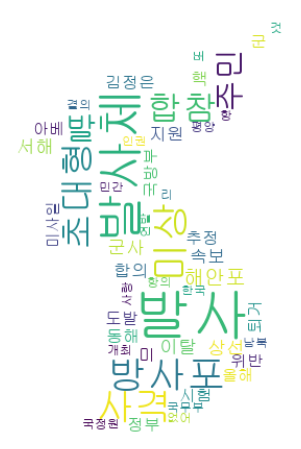

Word  num
0    발사  244
1   발사체  188
2    미상  106
3   방사포  102
4    사격   98
5   초대형   88
6    합참   82
7     발   74
8    주민   70
9   해안포   68
10   군사   56
11   이탈   54
12   서해   54
13   상선   52
14   합의   48
15   속보   46
16   지원   46
17    핵   44
18   동해   40
19   위반   40
20  김정은   38
21   시험   38
22   도발   38
23  국방부   38
24   추정   36
25    군   36
26   퇴거   34
27   정부   32
28    미   30
29   아베   28
30   올해   28
31  미사일   28
32  국정원   26
33    것   26
34  국무부   26
35    리   26
36    또   26
37   사랑   26
38   개최   24
39   연발   24
40   한국   24
41   민간   24
42   없어   24
43   평양   24
44   항의   24
45    항   24
46   인권   22
47   남북   22
48   결의   22

In [8]:
if __name__ == '__main__':
    #1~200번게시글 까지 크롤링
    get_titles(1,500)
 
    #단어 30개까지 wordcloud로 출력
    make_wordcloud(50)